In [1]:
## 사교육비 증가 추이 - 가구소득별
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
import math

# Warning 메세지 무시
warnings.filterwarnings('ignore')

# 데이터 부르기
df2=pd.read_excel('학생 1인당 사교육비.xlsx')

# Cleansing & Fixing
df3=df2.T
df4=df3.set_index([1])
df5=df4.drop([18,19,20,21,22], axis=1).fillna('')
df5.reset_index()
df5.drop([0],axis=1).reset_index()
df6=df5.rename(columns=df5.iloc[0])
df7=df6.reset_index().drop([0],axis=0).drop(['단위:'],axis=1).set_index([1])
df7.index.values[0]=''
df8=df7.reset_index()
df12=df8.rename(columns={1:'연도'}).set_index(keys='연도').reset_index()
df12.columns = df12.loc[0]
df12=df12.drop([0],axis=0).drop(df12.columns[2:5],axis=1)
df12=df12.drop(df12.columns[3],axis=1).drop(df12.columns[5],axis=1).drop(df12.columns[11],axis=1)

col=['연도','전체','100만원 미만','100-200만원','200-300만원','300-400만원','400-500만원',\
'500-600만원','600-700만원','700-800만원','800만원 이상']
df12.columns=col
df12=df12.set_index('연도').reset_index()
df12=df12.drop(df12.index[:7],axis=0)
df12=df12.set_index('연도').reset_index()

df12

,연도,전체,100만원 미만,100-200만원,200-300만원,300-400만원,400-500만원,500-600만원,600-700만원,700-800만원,800만원 이상
0,2014,24.2,6.6,10.2,15.9,21.2,27.2,31.9,36.7,-,-
1,2015,24.4,6.6,10.2,15.9,21.2,26.6,31.1,36.1,-,-
2,2016,25.6,5.0,9.8,15.4,21.1,26.5,31.0,36.5,-,-
3,2017,27.2,-,-,15.3,21.2,27.4,32.2,36.5,40.7,48.3
4,2018,29.1,-,-,15.6,22.2,27.9,32.9,37.3,42.2,50.5
5,2019,32.1,-,-,17.0,23.4,30.0,35.4,40.4,46.4,53.9
6,2020,30.2,-,-,15.8,20.4,26.9,32.5,37.2,44.1,52.6
7,2021,36.7,-,-,18.0,25.3,33.2,38.1,44.4,48.6,59.3
8,2022,41.0,-,-,20.5,27.2,35.1,39.9,46.9,51.8,64.8
9,2023,43.4,-,-,20.6,27.9,35.3,41.2,48.4,52.7,67.1


In [2]:
# 보간1 - 증가폭의 평균으로 보간
df13=df12.iloc[0:3,:].drop(df12.columns[9:],axis=1)
# df13
df13=df13.astype('float').astype({'연도':'int32'})
df13

,연도,전체,100만원 미만,100-200만원,200-300만원,300-400만원,400-500만원,500-600만원,600-700만원
0,2014,24.2,6.6,10.2,15.9,21.2,27.2,31.9,36.7
1,2015,24.4,6.6,10.2,15.9,21.2,26.6,31.1,36.1
2,2016,25.6,5.0,9.8,15.4,21.1,26.5,31.0,36.5


In [7]:
## 사교육비 증가 추이 - 초중고별
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
import math

# Warning 메세지 무시
warnings.filterwarnings('ignore')

# 데이터 부르기
df2=pd.read_excel('학생 1인당 사교육비.xlsx')

# Cleansing & Fixing
df3=df2.T
df4=df3.set_index([1])
df5=df4.drop([18,19,20,21,22], axis=1).fillna('')
df5.reset_index()
df5.drop([0],axis=1).reset_index()
df6=df5.rename(columns=df5.iloc[0])
df7=df6.reset_index().drop([0],axis=0).drop(['단위:'],axis=1).set_index([1])
df7.index.values[0]=''
df8=df7.reset_index()
df12=df8.rename(columns={1:'연도'}).set_index(keys='연도').reset_index()
df12.columns = df12.loc[0]
df12=df12.drop([0],axis=0).drop(df12.columns[2:5],axis=1)
df12=df12.drop(df12.columns[3],axis=1).drop(df12.columns[5],axis=1).drop(df12.columns[11],axis=1)

col=['연도','전체','100만원 미만','100-200만원','200-300만원','300-400만원','400-500만원',\
'500-600만원','600-700만원','700-800만원','800만원 이상']
df12.columns=col
df12=df12.set_index('연도').reset_index()
df12=df12.drop(df12.index[:7],axis=0)
df12=df12.set_index('연도').reset_index()

# 보간1 - 증가폭의 평균으로 보간
df13=df12.iloc[0:3,:].drop(df12.columns[9:],axis=1)
df13=df13.astype('float').astype({'연도':'int32'})

import pandas as pd

# 각 열에서 연속된 요소 간의 차이의 합과 평균을 계산하는 함수
def sum_mean(column):
    diffs = column[2:9].diff().sum()  # 연속된 요소 간의 차이 계산 후 합산
    mean_diff = diffs / (len(column[2:9]) - 1)  # 평균 계산
    return diffs, mean_diff

# 각 행에 함수 적용
results = [sum_mean(df13.iloc[i]) for i in range(3)]

# 결과 출력
for i, (total_sum, mean) in enumerate(results):
    print(f"행 {i} - 합계: {round(total_sum,1)}, 평균: {round(mean,1)}")
    if i==0:
        df13_sum1=round(total_sum,1)
#         print(df13_sum1) # 확인용
        df13_mean1=round(mean,1)
#         print(df13_mean1) # 확인용
    if i==1:
        df13_sum2=round(total_sum,1)
        df13_mean2=round(mean,1)
    if i==2:
        df13_sum3=round(total_sum,1)
        df13_mean3=round(mean,1)


df13['700-800만원']=[df13.iloc[0,8]+df13_mean1,df13.iloc[1,8]+df13_mean2,df13.iloc[2,8]+df13_mean3]
df13['800만원 이상']=[df13.iloc[0,9]+df13_mean1,df13.iloc[1,9]+df13_mean2,df13.iloc[2,9]+df13_mean3]

# 보간2
df14=df12.iloc[3:,:].drop(df12.columns[2:4],axis=1)
df14=df14.astype('float').astype({'연도':'int32'})
df14=df14.set_index('연도').reset_index()

# 각 열에서 연속된 요소 간의 차이의 합과 평균을 계산하는 함수
def sum_mean2(column):
    diffs2 = column[2:9].diff().sum()  # 연속된 요소 간의 차이 계산 후 합산
    mean_diff2 = diffs2 / (len(column[2:9]) - 1)  # 평균 계산
    return diffs2, mean_diff2

# 각 행에 함수 적용
results2 = [sum_mean2(df14.iloc[i]) for i in range(7)]

# 결과 출력
for i, (total_sum, mean) in enumerate(results2):
    print(f"행 {i} - 합계: {round(total_sum,1)}, 평균: {round(mean,1)}")
    if i==0:
        df14_sum1=round(total_sum,1)
#         print(df13_sum1) # 확인용
        df14_mean1=round(mean,1)
#         print(df13_mean1) # 확인용
    if i==1:
        df14_sum2=round(total_sum,1)
        df14_mean2=round(mean,1)
    if i==2:
        df14_sum3=round(total_sum,1)
        df14_mean3=round(mean,1)
    if i==3:
        df14_sum4=round(total_sum,1)
        df14_mean4=round(mean,1)
    if i==4:
        df14_sum5=round(total_sum,1)
        df14_mean5=round(mean,1)
    if i==5:
        df14_sum6=round(total_sum,1)
        df14_mean6=round(mean,1)
    if i==6:
        df14_sum7=round(total_sum,1)
        df14_mean7=round(mean,1)


df14['100-200만원']=[df14.iloc[0,2]-round(df14_mean1,1),df14.iloc[1,2]-round(df14_mean2,1),\
                     df14.iloc[2,2]-round(df14_mean3,1),df14.iloc[3,2]-round(df14_mean4,1),\
                     df14.iloc[4,2]-round(df14_mean5,1),df14.iloc[5,2]-round(df14_mean6,1),\
                     df14.iloc[6,2]-round(df14_mean7,1)]
df14['100만원 미만']=[df14.iloc[0,9]-round(df14_mean1,1),df14.iloc[1,9]-round(df14_mean2,1),\
                     df14.iloc[2,9]-round(df14_mean3,1),df14.iloc[3,9]-round(df14_mean4,1),\
                     df14.iloc[4,9]-round(df14_mean5,1),df14.iloc[5,9]-round(df14_mean6,1),\
                     df14.iloc[6,9]-round(df14_mean7,1)]

df14=df14[['연도','전체','100만원 미만','100-200만원','200-300만원','300-400만원','400-500만원',\
           '500-600만원','600-700만원','700-800만원','800만원 이상']]

df15=pd.concat([df13,df14],axis=0)
df15=df15.set_index('연도').reset_index()
df15

행 0 - 합계: 30.1, 평균: 5.0
행 1 - 합계: 29.5, 평균: 4.9
행 2 - 합계: 31.5, 평균: 5.2
행 0 - 합계: 33.0, 평균: 5.5
행 1 - 합계: 34.9, 평균: 5.8
행 2 - 합계: 36.9, 평균: 6.1
행 3 - 합계: 36.8, 평균: 6.1
행 4 - 합계: 41.3, 평균: 6.9
행 5 - 합계: 44.3, 평균: 7.4
행 6 - 합계: 46.5, 평균: 7.7


,연도,전체,100만원 미만,100-200만원,200-300만원,300-400만원,400-500만원,500-600만원,600-700만원,700-800만원,800만원 이상
0,2014,24.2,6.6,10.2,15.9,21.2,27.2,31.9,36.7,41.7,46.7
1,2015,24.4,6.6,10.2,15.9,21.2,26.6,31.1,36.1,41.0,45.9
2,2016,25.6,5.0,9.8,15.4,21.1,26.5,31.0,36.5,41.7,46.9
3,2017,27.2,4.3,9.8,15.3,21.2,27.4,32.2,36.5,40.7,48.3
4,2018,29.1,4.0,9.8,15.6,22.2,27.9,32.9,37.3,42.2,50.5
5,2019,32.1,4.8,10.9,17.0,23.4,30.0,35.4,40.4,46.4,53.9
6,2020,30.2,3.6,9.7,15.8,20.4,26.9,32.5,37.2,44.1,52.6
7,2021,36.7,4.2,11.1,18.0,25.3,33.2,38.1,44.4,48.6,59.3
8,2022,41.0,5.7,13.1,20.5,27.2,35.1,39.9,46.9,51.8,64.8
9,2023,43.4,5.2,12.9,20.6,27.9,35.3,41.2,48.4,52.7,67.1


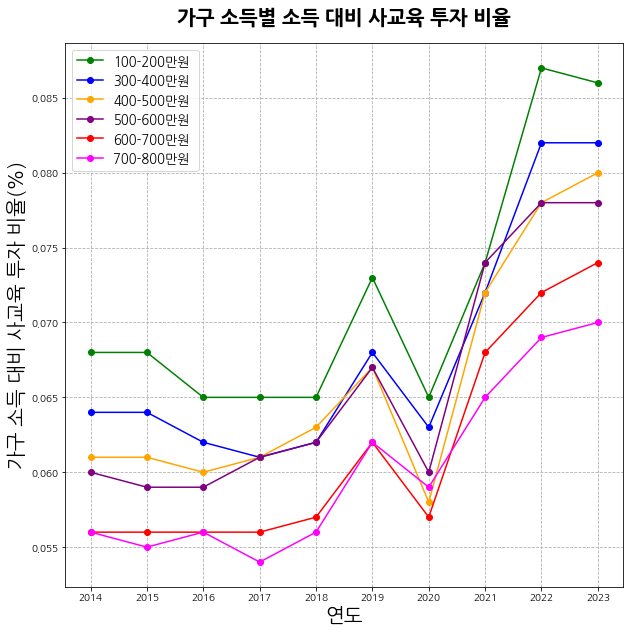

In [8]:
# 시각화

# df15['100만원 미만 소득 대비 사교육 비용']=round(df15['100만원 미만']/50,3)
df15['100-200만원 소득 대비 사교육 비용']=round(df15['100-200만원']/150,3)
df15['200-300만원 소득 대비 사교육 비용']=round(df15['200-300만원']/250,3)
df15['300-400만원 소득 대비 사교육 비용']=round(df15['300-400만원']/350,3)
df15['400-500만원 소득 대비 사교육 비용']=round(df15['400-500만원']/450,3)
df15['500-600만원 소득 대비 사교육 비용']=round(df15['500-600만원']/550,3)
df15['600-700만원 소득 대비 사교육 비용']=round(df15['600-700만원']/650,3)
df15['700-800만원 소득 대비 사교육 비용']=round(df15['700-800만원']/750,3)
# df15['800만원 이상 소득 대비 사교육 비용']=round(df15['800만원 이상']/850,3)

df15

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
fig2=plt.figure(figsize=(10,10))
axes2=fig2.add_subplot(111)

# axes2.plot(df15['연도'],df15['100만원 미만 소득 대비 사교육 비용'],color='black',marker='o',label='100만원 미만')
axes2.plot(df15['연도'],df15['100-200만원 소득 대비 사교육 비용'],color='green',marker='o',label='100-200만원')
axes2.plot(df15['연도'],df15['200-300만원 소득 대비 사교육 비용'],color='blue',marker='o',label='300-400만원')
axes2.plot(df15['연도'],df15['300-400만원 소득 대비 사교육 비용'],color='orange',marker='o',label='400-500만원')
axes2.plot(df15['연도'],df15['400-500만원 소득 대비 사교육 비용'],color='purple',marker='o',label='500-600만원')
axes2.plot(df15['연도'],df15['600-700만원 소득 대비 사교육 비용'],color='red',marker='o',label='600-700만원')
axes2.plot(df15['연도'],df15['700-800만원 소득 대비 사교육 비용'],color='magenta',marker='o',label='700-800만원 ')
# axes2.plot(df15['연도'],df15['800만원 이상 소득 대비 사교육 비용'],color='cyan',marker='o',label='800만원 이상')

plt.title("가구 소득별 소득 대비 사교육 투자 비율",fontsize=20, fontweight='bold',pad=20)
plt.xlabel('연도',fontsize=20)
plt.ylabel('가구 소득 대비 사교육 투자 비율(%)',fontsize=20)
plt.xticks(range(2014,2024,1))
plt.grid(linestyle = '--')
plt.legend(loc=2,fontsize=13)
# plt.savefig('초중고 연도별 사교육 비용.png')
plt.savefig('가구 소득별 소득 대비 사교육 투자 비율.jpg')
plt.show()